In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [12]:
data = pd.read_csv('https://raw.githubusercontent.com/patelatwork/AgriAi-Hackathon/refs/heads/main/Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [14]:
data.shape

(2200, 8)

In [16]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

C:\Users\DHRUV PATEL\AppData\Local\Temp\ipykernel_20920\482957319.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, order=data['label'].value_counts().index, palette='viridis')


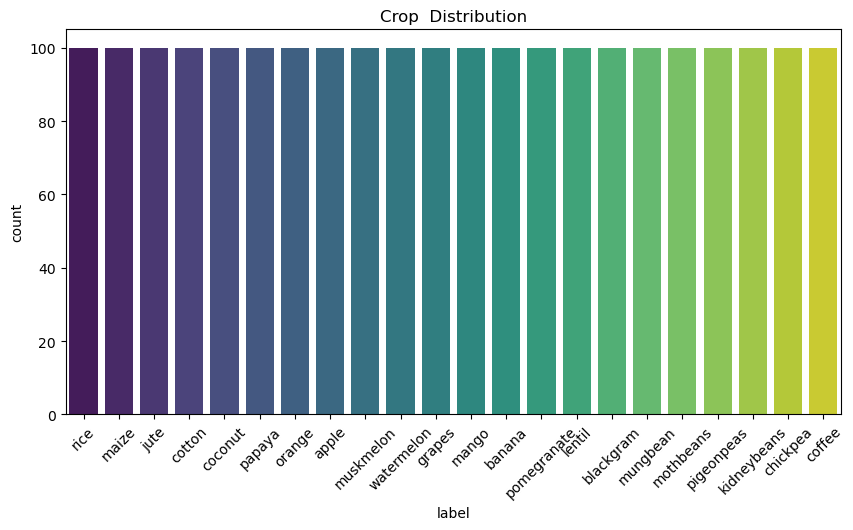

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=data, order=data['label'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Crop  Distribution')
plt.show()

In [20]:
imputer = SimpleImputer(strategy='mean')
data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']] = imputer.fit_transform(
    data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
)

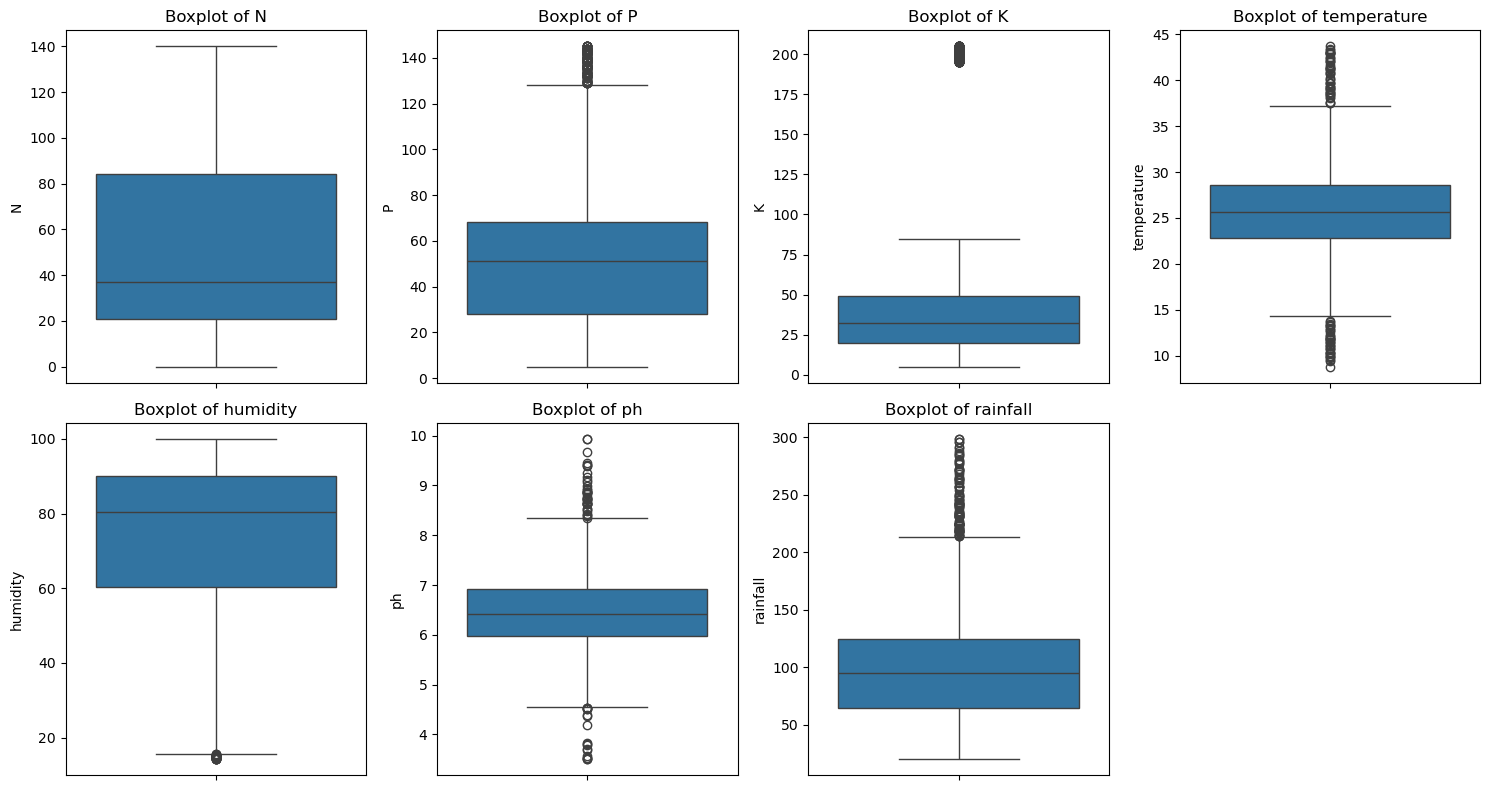

In [22]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [54]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    cap_outliers(data, col)

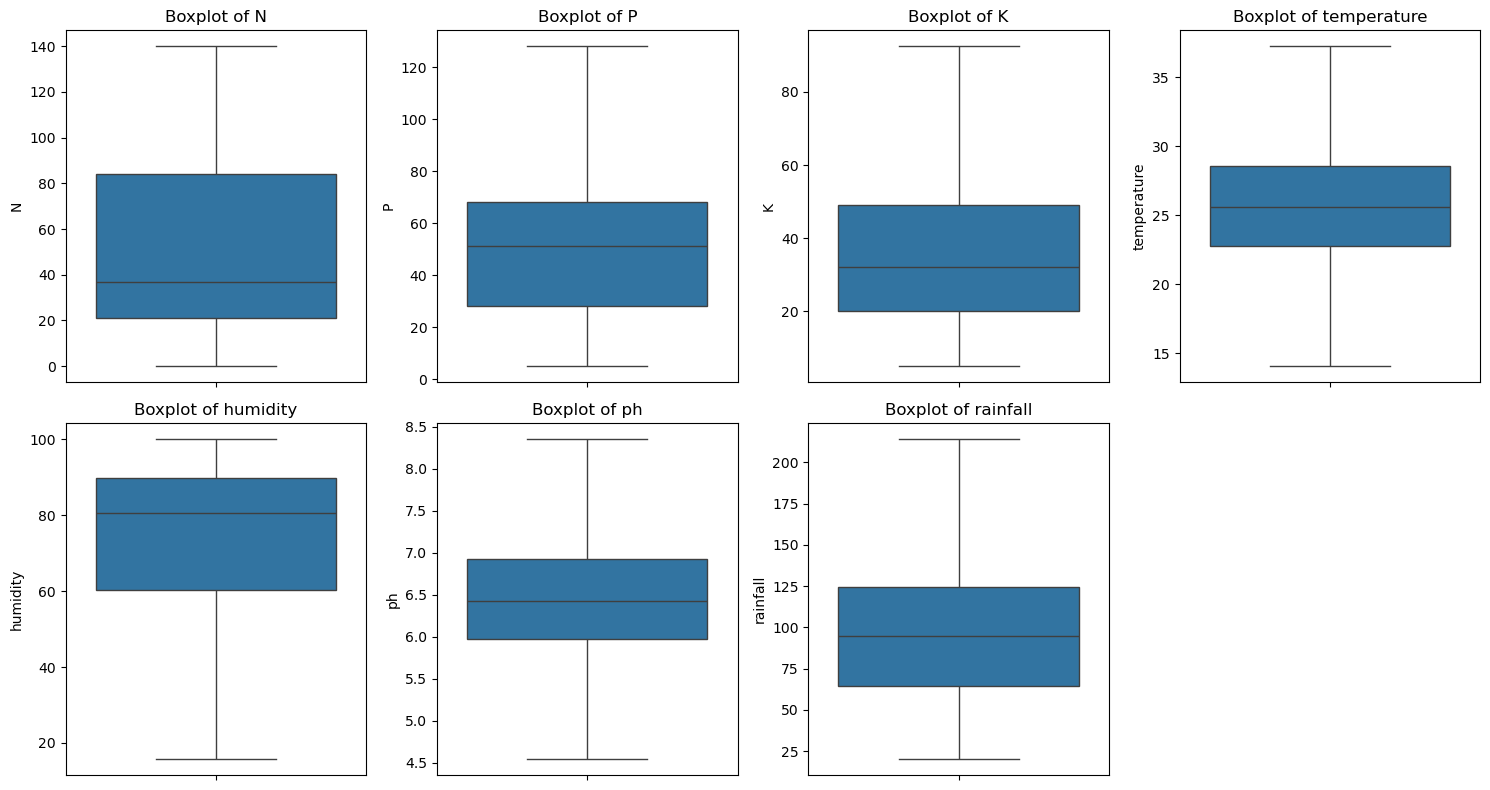

In [56]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

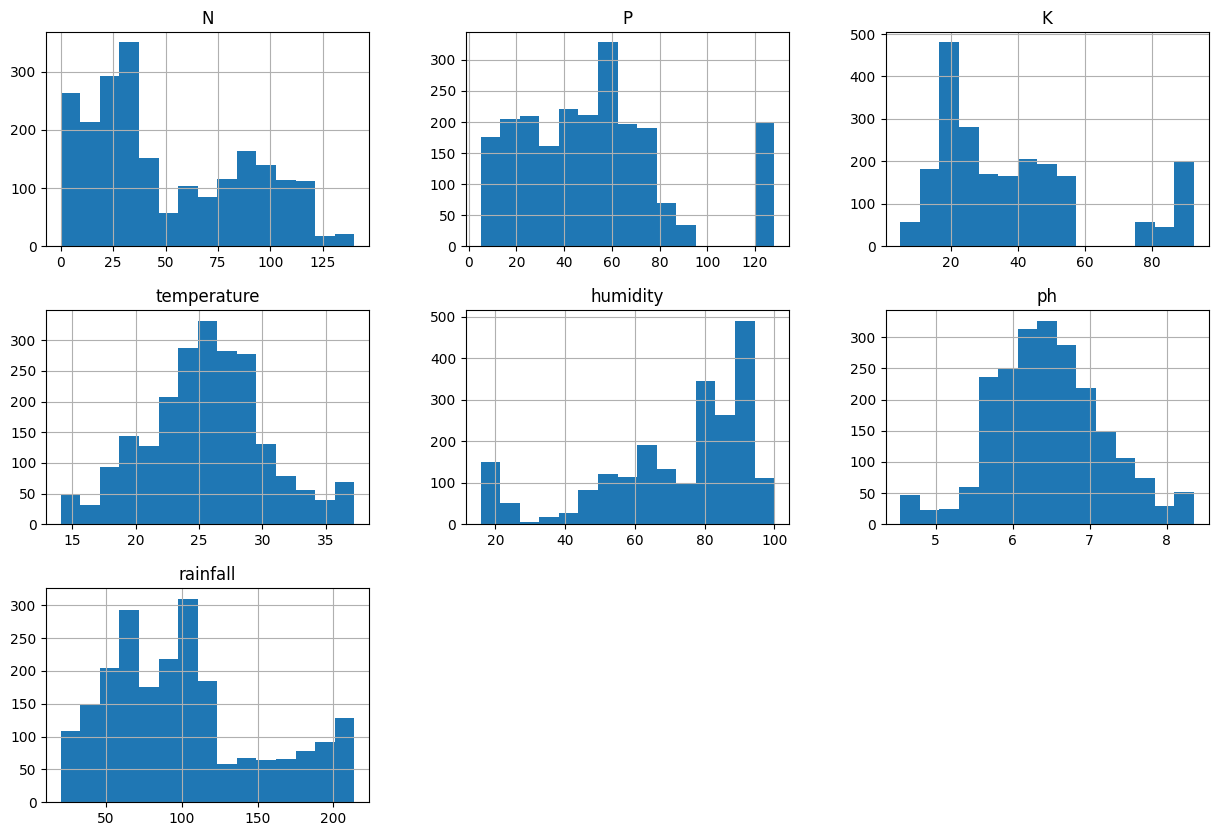

In [ ]:
data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].hist(bins=15, figsize=(15, 10))
plt.show()

C:\Users\DHRUV PATEL\AppData\Local\Temp\ipykernel_20920\1015458736.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


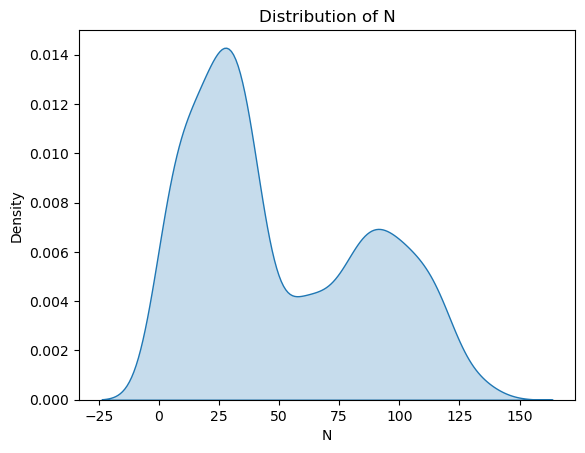

C:\Users\DHRUV PATEL\AppData\Local\Temp\ipykernel_20920\1015458736.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


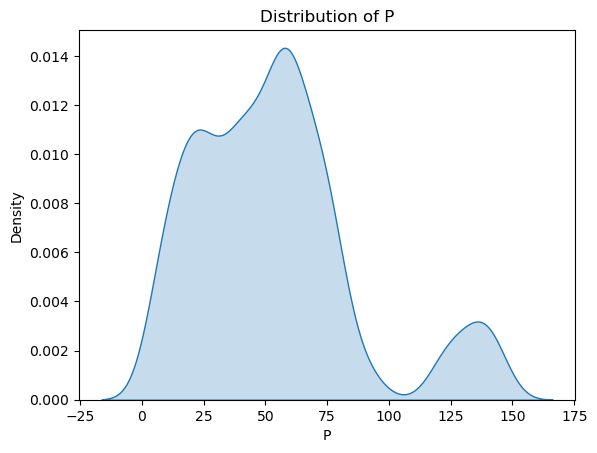

C:\Users\DHRUV PATEL\AppData\Local\Temp\ipykernel_20920\1015458736.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


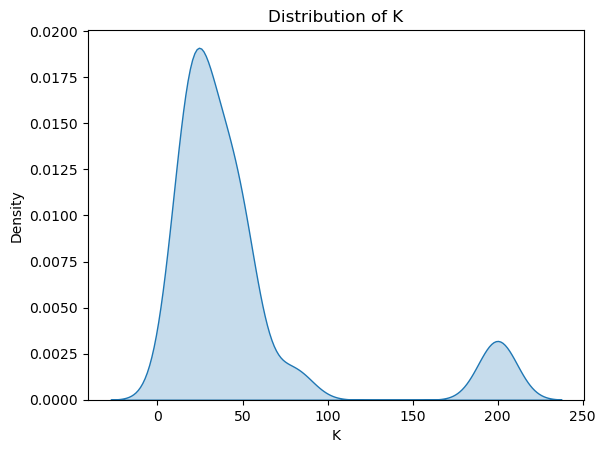

C:\Users\DHRUV PATEL\AppData\Local\Temp\ipykernel_20920\1015458736.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


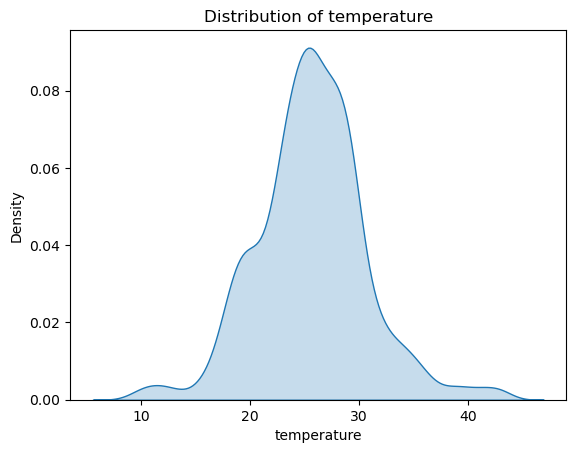

C:\Users\DHRUV PATEL\AppData\Local\Temp\ipykernel_20920\1015458736.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


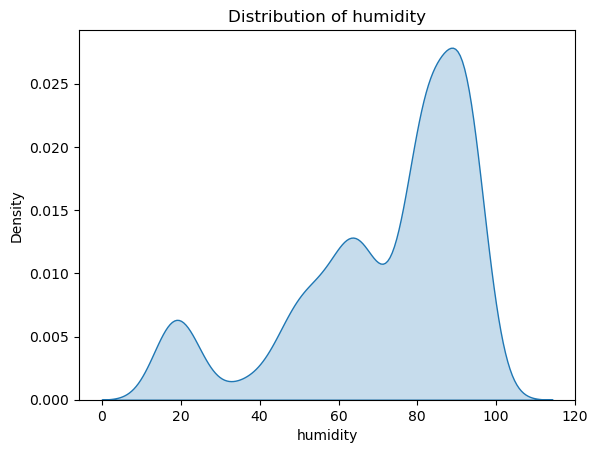

C:\Users\DHRUV PATEL\AppData\Local\Temp\ipykernel_20920\1015458736.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


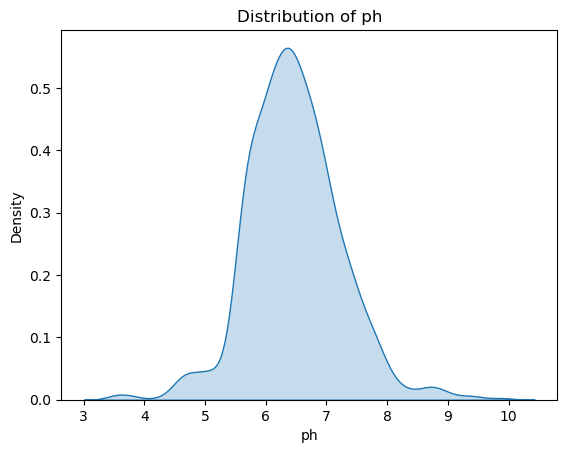

C:\Users\DHRUV PATEL\AppData\Local\Temp\ipykernel_20920\1015458736.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


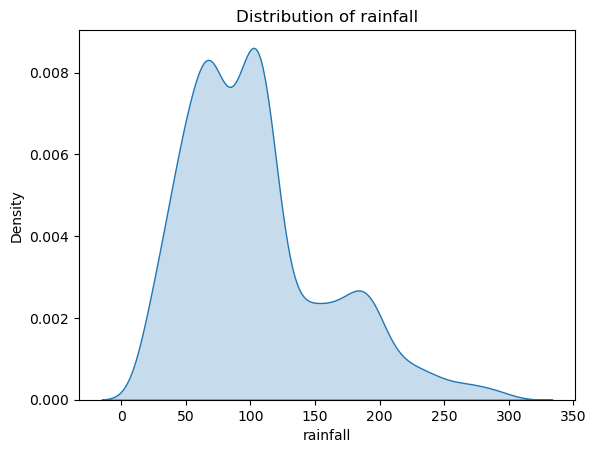

In [26]:
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    sns.kdeplot(data[col], shade=True)
    plt.title(f'Distribution of {col}')
    plt.show()

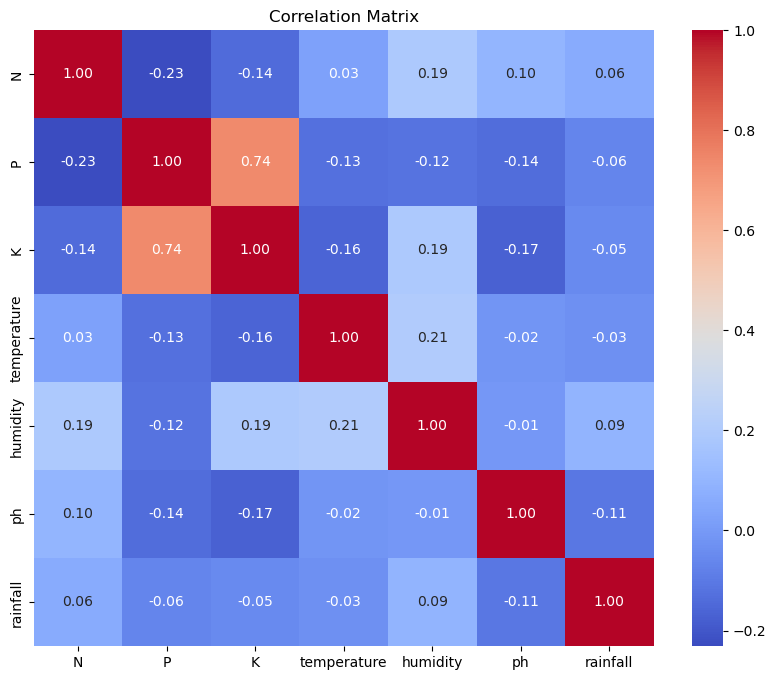

In [28]:
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

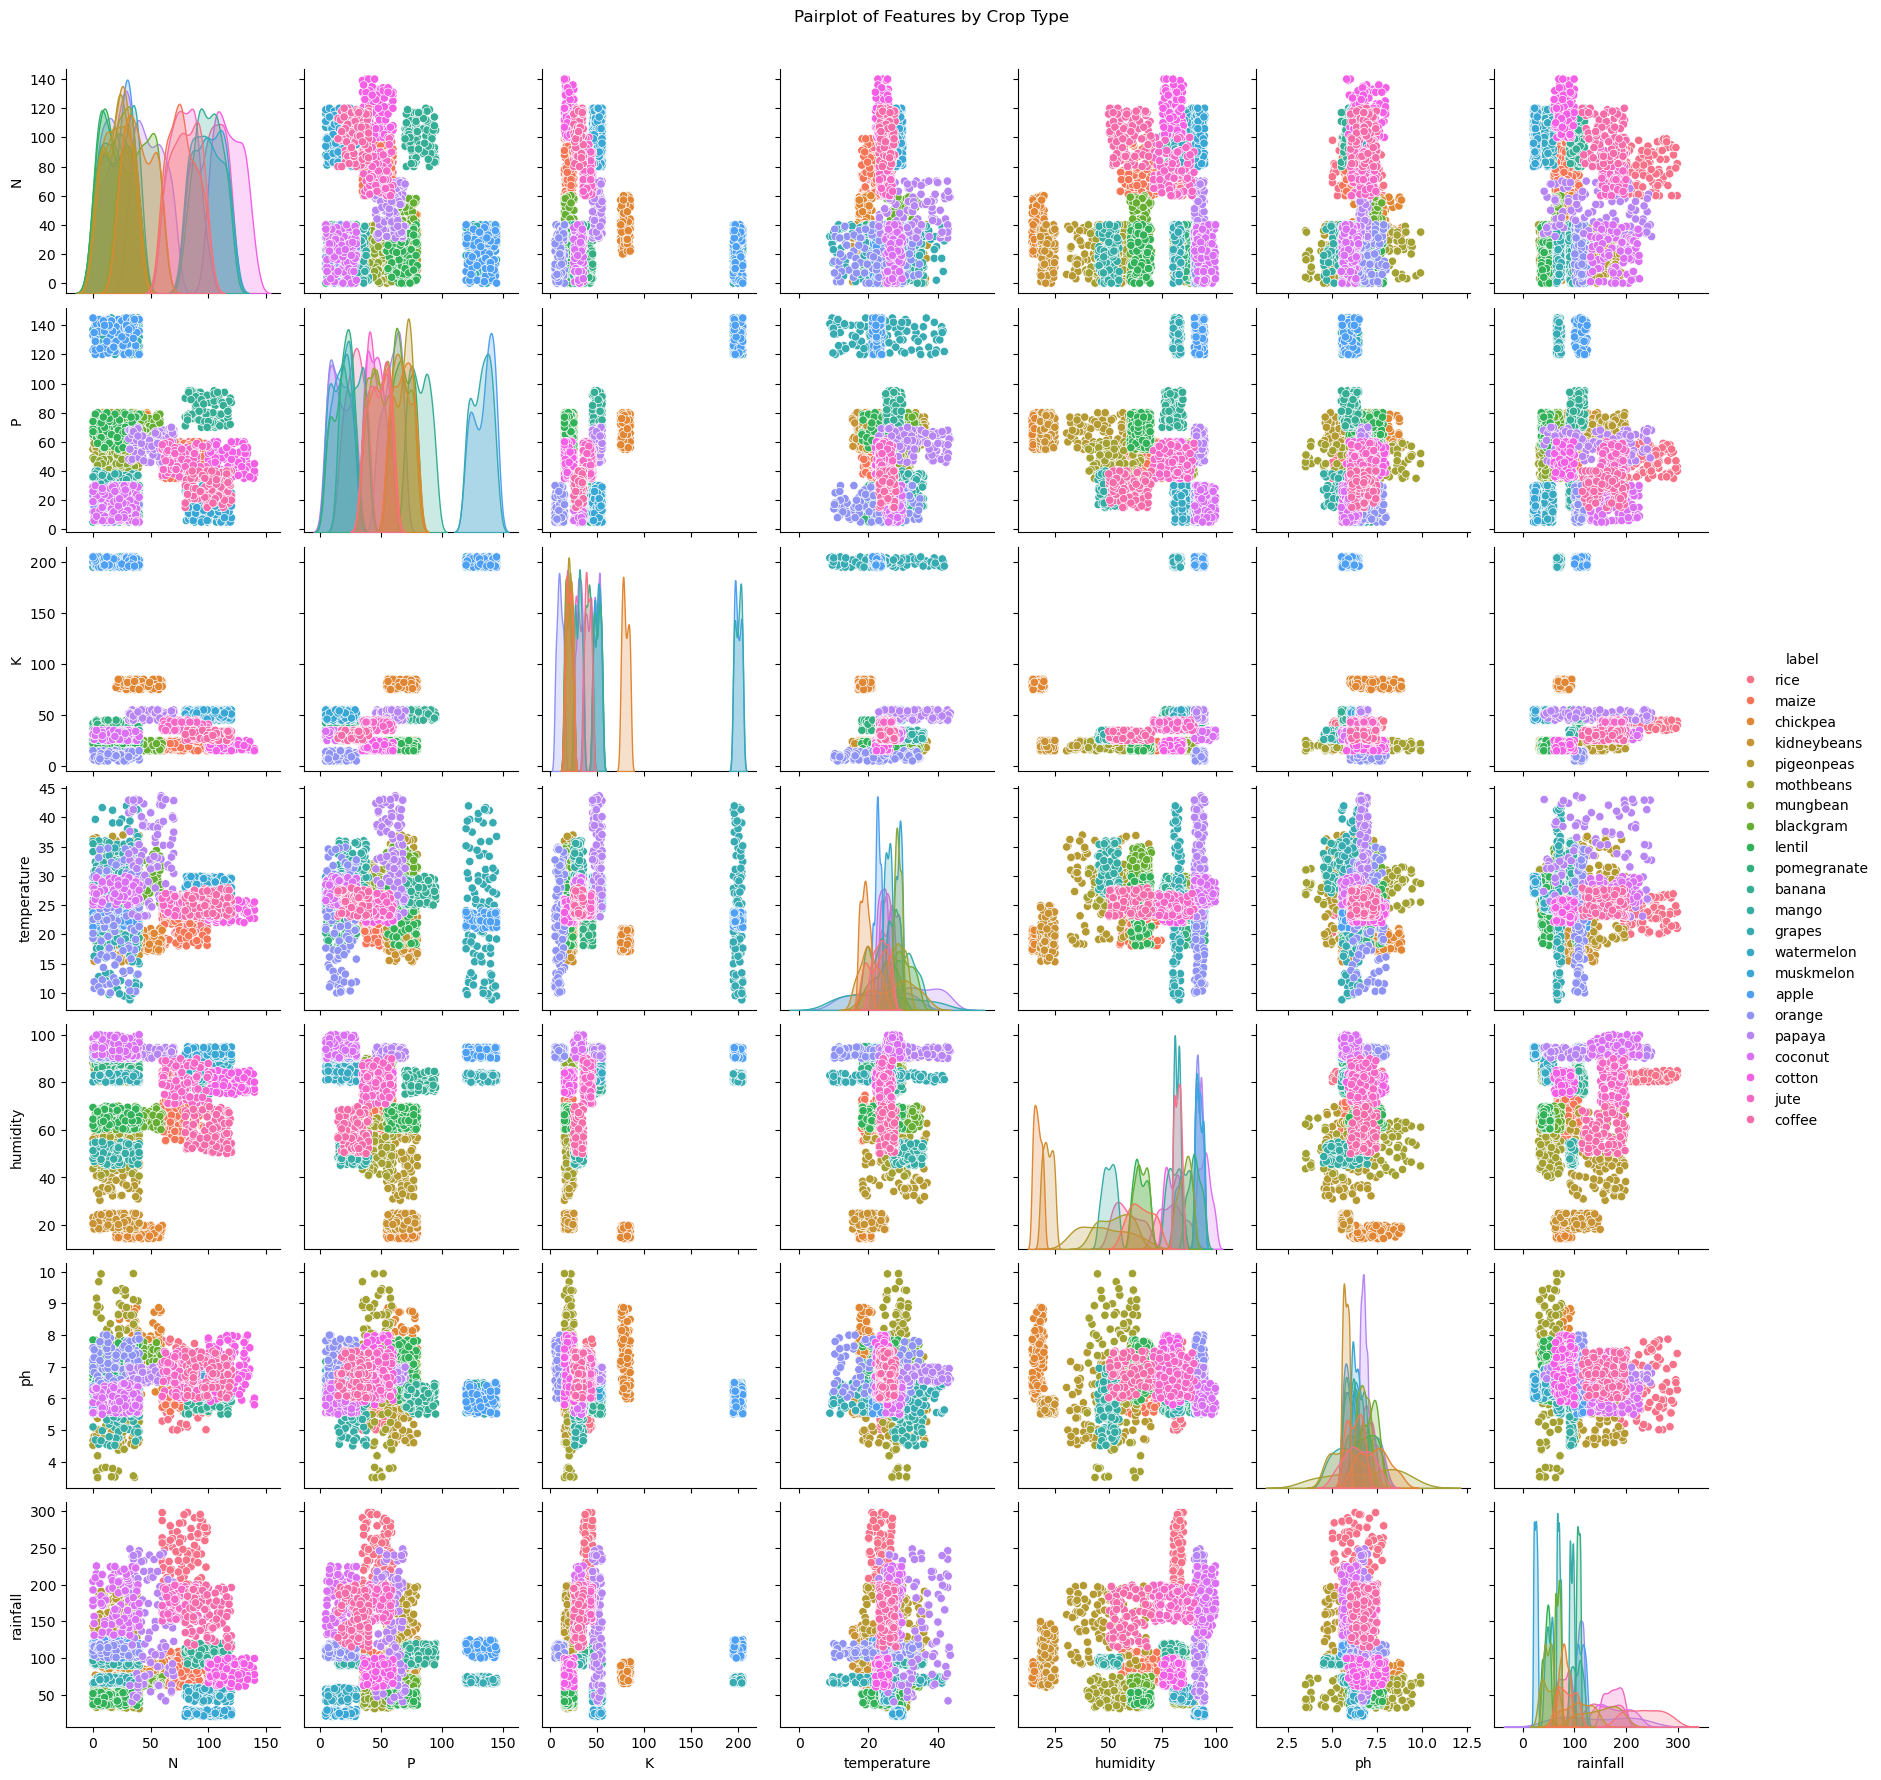

In [30]:
data = data.replace([np.inf, -np.inf], np.nan)

# Pairplot
sns.pairplot(
    data,
    vars=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'],
    hue='label',
    palette='husl'
)
plt.suptitle("Pairplot of Features by Crop Type", y=1.02)
plt.show()

In [ ]:
# label_encoder = LabelEncoder()
# data['crop'] = label_encoder.fit_transform(data['label'])

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
class OutlierCapper(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        self.bounds = {}
        for col in self.columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            self.bounds[col] = (lower_bound, upper_bound)
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            lower_bound, upper_bound = self.bounds[col]
            X[col] = np.where(X[col] < lower_bound, lower_bound, X[col])
            X[col] = np.where(X[col] > upper_bound, upper_bound, X[col])
        return X

numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
categorical_features = ['label']

# Label Encoding function
from sklearn.preprocessing import OrdinalEncoder

('label_encoder', OrdinalEncoder(), categorical_features)


# ColumnTransformer for preprocessing
preprocessor = ColumnTransformer([
    ("outlier_capping", OutlierCapper(numerical_features), numerical_features),  # Handles all numeric cols
    ("scaler", StandardScaler(), numerical_features),  # Standard scaling
    ('label_encoder', OrdinalEncoder(), categorical_features)  # Label encoding
])

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier



In [ ]:
# encoder = LabelEncoder()
# encoder.fit_transform(y_train)

array([16,  2, 10, ..., 12,  7, 10], dtype=int64)

In [ ]:
# encoder.fit_transform(y_test)

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1,  2, 21,  4, 10, 16, 17, 18, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3, 20, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4, 20,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4, 11,  0,  4,  9, 13, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(random_state=42,bootstrap= False, max_depth= None, min_samples_leaf= 2, min_samples_split =10, n_estimators= 200)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# y_train = label_encoder.fit_transform(y_train)  # Convert labels to numbers
# y_test = label_encoder.transform(y_test)        # Transform test labels the same way


In [36]:
print(data.columns)


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [38]:
# Encode labels before splitting
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Split features and target
X = data.drop(columns=['label'])  # Features
y = data['label']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing without label encoding
preprocessor = ColumnTransformer([
    ("outlier_capping", OutlierCapper(numerical_features), numerical_features),
    ("scaler", StandardScaler(), numerical_features)
])

pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42, bootstrap=False, max_depth=None, min_samples_split=10, n_estimators=200))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      0.96      0.94        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

In [40]:
y_pred = pipeline.predict(X_test)


In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      0.96      0.94        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

In [44]:
import pickle
with open('crop_recommendation_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)


In [46]:
with open('crop_recommendation_pipeline.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

In [66]:
# Define feature names (matching those in training data)
feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Generate a random sample
random_sample = np.array([[
    np.random.randint(0, 140),   # Nitrogen (N)
    np.random.randint(5, 145),   # Phosphorus (P)
    np.random.randint(5, 205),   # Potassium (K)
    np.random.uniform(10, 40),   # Temperature (°C)
    np.random.uniform(10, 90),   # Humidity (%)
    np.random.uniform(3.5, 9),   # pH
    np.random.uniform(20, 300)   # Rainfall (mm)
]])

# Convert to DataFrame with column names
random_sample_df = pd.DataFrame(random_sample, columns=feature_names)

# Predict the recommended crop
predicted_crop = loaded_pipeline.predict(random_sample_df)
# Convert numeric prediction back to original crop label
predicted_crop_name = label_encoder.inverse_transform([predicted_crop[0]])

# Display results
print("Random Sample Features:")
print(random_sample_df)
print("Predicted Crop Name:", predicted_crop_name[0])

Random Sample Features:
       N     P      K  temperature   humidity        ph    rainfall
0  119.0  22.0  173.0      30.5063  75.847038  4.647392  138.596379
Predicted Crop Name: grapes


In [62]:
# Convert numeric prediction back to original crop label
predicted_crop_name = label_encoder.inverse_transform([predicted_crop[0]])

print("Predicted Crop:", predicted_crop_name[0])

Predicted Crop: grapes


In [52]:
y_pred = loaded_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      0.96      0.94        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

In [58]:
pip show scikit-learn

Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\DHRUV PATEL\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.


In [64]:
from joblib import dump, load
dump(pipeline, 'crop_recommendation_pipeline.joblib')
crop_model = load('crop_recommendation_pipeline.joblib')